In [1]:
#Actividad 5 Uso de software para búsqueda.
#Arturo Azael Niño Lopez 1973434
#N1


In [2]:
#Cargar librerias

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)



2.15.0


In [33]:
#Cargar datos

numeros_mnist=keras.datasets.mnist
(train_images, train_labels) ,(test_images, test_labels)=numeros_mnist.load_data(path="mnist.npz")


In [20]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [7]:
train_images.shape

(60000, 28, 28)

In [28]:
len(train_labels)

60000

In [29]:
train_labels


array([7.68935025e-05, 0.00000000e+00, 6.15148020e-05, ...,
       7.68935025e-05, 9.22722030e-05, 1.23029604e-04])

In [30]:
test_images.shape

(10000, 28, 28)

In [31]:
len(test_labels)

10000

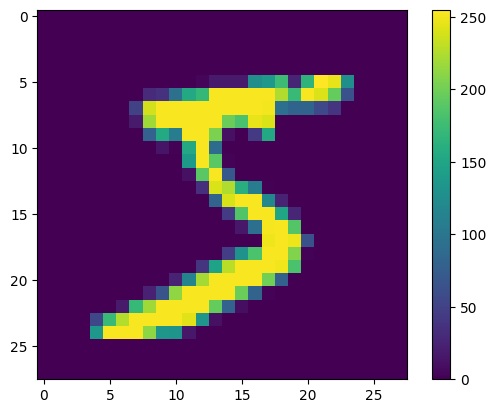

In [34]:
#Preprocesamiento de datos

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()



In [23]:
train_numeros= train_imagess/ 255.0
train_labels= train_labels/ 255.0

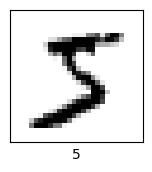

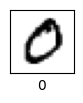

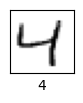

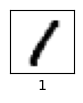

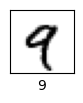

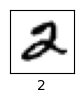

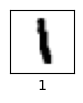

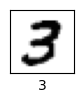

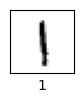

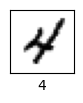

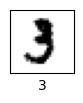

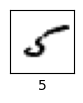

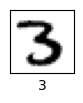

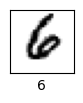

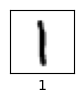

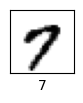

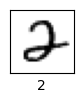

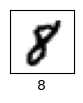

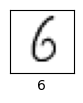

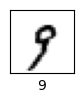

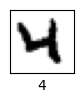

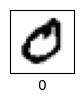

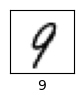

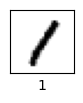

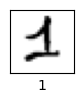

In [35]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

In [36]:
#Seleccion y entrenamiento del modelo
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])



In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [38]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.5213 - accuracy: 0.8532
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3866 - accuracy: 0.9060
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2988 - accuracy: 0.9260
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2497 - accuracy: 0.9367
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2297 - accuracy: 0.9417
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2199 - accuracy: 0.9453
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2070 - accuracy: 0.9470
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1987 - accuracy: 0.9494
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2002 - accuracy: 0.9506
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1

In [39]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3289 - accuracy: 0.9452 - 1s/epoch - 4ms/step

Test accuracy: 0.9452000260353088


In [40]:
#Prueba del modelo
predictions = model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [42]:
predictions[0]

array([0.0000000e+00, 5.0045671e-16, 1.2957535e-11, 3.4908879e-08,
       1.4141485e-14, 1.4297484e-14, 7.7542815e-36, 9.9999994e-01,
       2.8328070e-21, 7.2710235e-17], dtype=float32)

In [43]:
np.argmax(predictions[0])

7

In [45]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

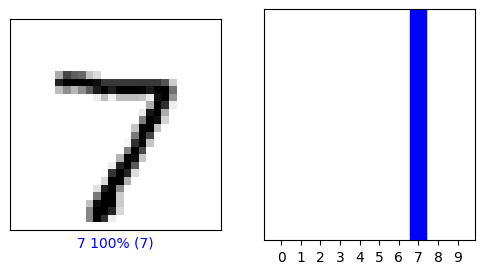

In [46]:
#prediccion 1
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

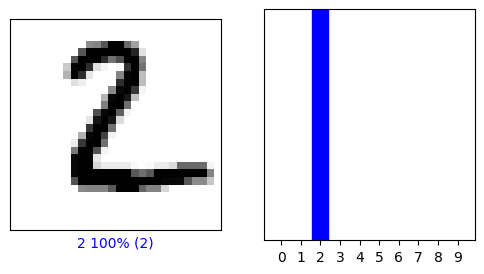

In [48]:
#prediccion 2
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

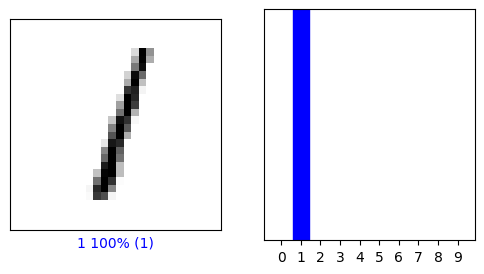

In [49]:
#prediccion 3
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

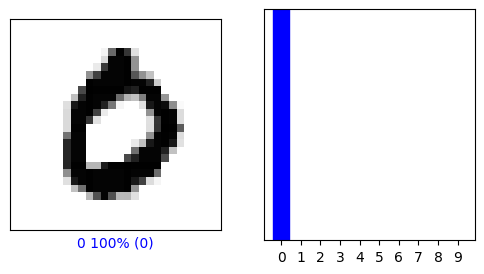

In [51]:
#prediccion 4
i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

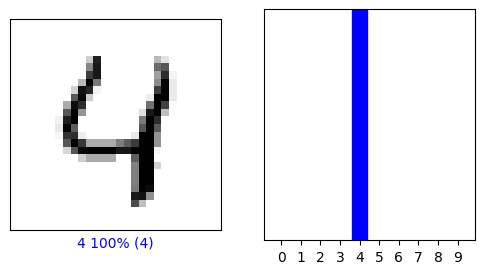

In [52]:
#prediccion 5
i = 4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()